Una Búsqueda en profundidad (en inglés DFS o Depth First Search) es un algoritmo de búsqueda utilizado para recorrer todos los nodos de un grafo o árbol de manera ordenada, pero no uniforme. Su funcionamiento consiste en ir expandiendo todos y cada uno de los nodos que va localizando, de forma recurrente, en un camino concreto. Cuando ya no quedan más nodos que visitar en dicho camino, regresa de modo que repite el mismo proceso con cada uno de los hermanos del nodo ya procesado.

En Ciencias de la Computación, Búsqueda en anchura (en inglés BFS - Breadth First Search) es un algoritmo de búsqueda utilizado para recorrer o buscar elementos en un grafo (usado frecuentemente sobre árboles). Intuitivamente, se comienza en la raíz (eligiendo algún nodo como elemento raíz en el caso de un grafo) y se exploran todos los vecinos de este nodo. A continuación para cada uno de los vecinos se exploran sus respectivos vecinos adyacentes, y así hasta que se recorra todo el árbol.

Formalmente, BFS es un algoritmo de búsqueda sin información, que expande y examina todos los nodos de un árbol sistemáticamente para buscar una solución.

```
from collections import deque

class Node:
    def __init__(self, value):
        self.value = value
        self.children = []

def dfs(node):
    print(node.value)  # Visitar nodo
    for child in node.children:
        dfs(child)


def bfs(node):
    queue = deque([node])
    while queue:
        current_node = queue.popleft()
        print(current_node.value)  # Visitar nodo
        queue.extend(current_node.children)
        

Los anteriores codigos pueden modificarse para buscar un elemento dentro de un arbol, dado que ambos recorren todos los nodos de este

In [ ]:
from collections import deque

def dfs_search(node, target):
    if node.value == target:
        return True
    for child in node.children:
        if dfs_search(child, target):
            return True
    return False
    

def bfs_search(node, target):
    queue = deque([node])
    while queue:
        current_node = queue.popleft()
        if current_node.value == target:
            return True
        queue.extend(current_node.children)
    return False

### Grafos

Un grafo es una estructura que tiene nodos interrelacionados. En los nodos generalmente se guarda información. Los árboles que ya vimos son en efecto un tipo particular de grafos en los cuales no se producen ciclos. Por ejemplo, un grafo que conecta distintas ciudades. En este caso cada arista representa una ruta entre ambas ciudades. La ruta la consideramos como "bidireccional", pero hay variantes de grafos en la que la relación es unidireccional (a esos grafos se los denomina dígrafo).

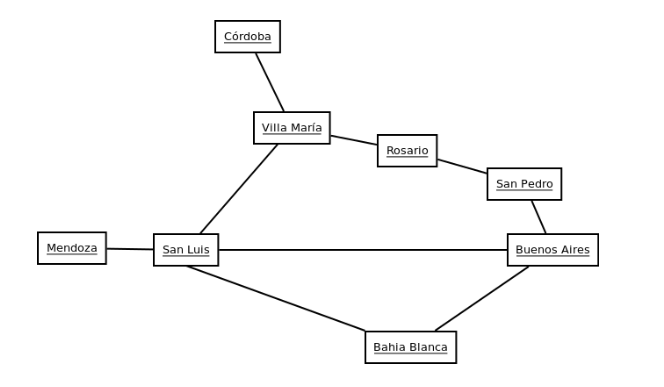



Son muchas las formas de modelar un grafo, se puede pensar en nodos enlazados al estilo de los árboles que ya vimos. Como un grafo no tiene raíz, vamos a querer consultarlo a partir de cualquier elemento. Por eso nuestra implementación la vamos a realizar un diccionario que nos relacione un elemento con sus vecinos.



In [1]:
class Grafo(object):
    def __init__(self):
        self.relaciones = {}
    def __str__(self):
        return str(self.relaciones)

def agregar(grafo, elemento):
    grafo.relaciones.update({elemento:[]})
def relacionar(grafo, elemento1, elemento2):
    relacionarUnilateral(grafo, elemento1, elemento2)
    relacionarUnilateral(grafo, elemento2, elemento1)
    
def relacionarUnilateral(grafo, origen, destino):
    grafo.relaciones[origen].append(destino)

Recorridos
Los conceptos de profundidad primero y ancho primero también son aplicables a los grafos, pero necesitamos hacer cierta modificación para eliminar los ciclos. La manera de detectar ciclos es tener cierta memoria sobre los nodos que ya hemos visitado, para evitar recorrer el camino que ya recorrimos.

Profundidad Primero
Modificamos el algoritmo que teníamos para árboles, para utiizar una semilla que nos permite saber si un nodo fue visitado o no

In [ ]:
def profundidadPrimero(grafo, elementoInicial, funcion, elementosRecorridos = []):
    if elementoInicial in elementosRecorridos:
        return
    funcion(elementoInicial)
    elementosRecorridos.append(elementoInicial)
    for vecino in grafo.relaciones[elementoInicial]:
        profundidadPrimero(grafo, vecino, funcion, elementosRecorridos)

Ancho primero
De manera similar, podemos modificar el algoritmo de ancho primero para detectar los ciclos

In [ ]:
def anchoPrimero(grafo, elementoInicial, funcion, cola = deque(), elementosRecorridos = []):
    if not elementoInicial in elementosRecorridos:
        funcion(elementoInicial)
        elementosRecorridos.append(elementoInicial)
        if(len(grafo.relaciones[elementoInicial]) > 0):
            cola.extend(grafo.relaciones[elementoInicial])
    if len(cola) != 0 :
        anchoPrimero(grafo, cola.popleft(), funcion, cola, elementosRecorridos)

Caminos y Pesos
Un camino es una sucesión de nodos que se puede recorrer siguiendo las aristas de los grafos.  Por ejemplo, si quiero ir de Buenos Aires a Villa María puedo ir de por 3 caminos:

Camino 1: Buenos Aires, San Pedro, Rosario, Villa María
Camino 2: Buenos Aires, San Luis, Villa María
Camino 3: Buenos Aires, Bahia Blanca, San Luis, Villa María.
Si contamos la cantidad de pasos, el primer camino tiene 3 pasos, el segundo tiene 2 pasos y el tercero 3 pasos.

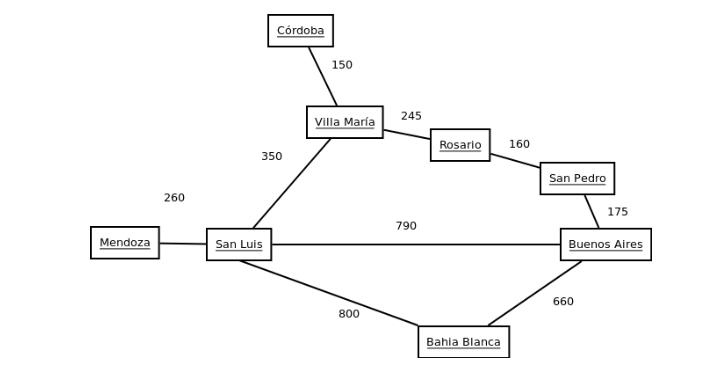

Sin embargo, el criterio de contar pasos no parece ser útil si quiero conocer el camino mínimo para viajar de Buenos Aires a Villa María. Para resolver ese problema nos falta agregar la cantidad de km que hay entre cada ciudad. Este valor, que es la distancia en km en nuestro caso concreto, lo vamos a generalizar con el nombre de peso para cualquier grafo y representa el costo de transicionar por una arista.

Ahora, para cada camino, la distancia sería:

Camino 1: Buenos Aires, San Pedro, Rosario, Villa María = 175 + 160 + 245 = 575
Camino 2: Buenos Aires, San Luis, Villa María = 790 + 350 = 1140
Camino 3: Buenos Aires, Bahia Blanca, San Luis, Villa María = 660 + 800 + 260 = 1720
Los grafos que no tienen pesos pueden ser vistos como grafos cuyos pesos tienen el valor de 1, de esa manera el costo de un camino es la suma de pasos.

In [1]:
#Ejemplo grafo:
class Grafo:
    def __init__(self):
        self.grafo = {}

    def __str__(self):
        return str(self.grafo)

    def agregar_arista(self, origen, destino, peso):
        if origen not in self.grafo:
            self.grafo[origen] = []
        if destino not in self.grafo:
            self.grafo[destino] = []
        self.grafo[origen].append((destino, peso))
        self.grafo[destino].append((origen, peso))

    def buscar_ruta(self, inicio, fin, max_combustible):
        def dfs(ciudad_actual, destino, combustible_restante, ruta):
            if combustible_restante < 0:
                return None
            if ciudad_actual == destino:
                return ruta
            for vecino, peso in self.grafo.get(ciudad_actual, []):
                if vecino not in ruta:  # Evitar ciclos
                    resultado = dfs(vecino, destino, combustible_restante - peso, ruta + [vecino])
                    if resultado is not None:
                        return resultado
            return None

        return dfs(inicio, fin, max_combustible, [inicio])


grafo = Grafo()
grafo.agregar_arista("Córdoba", "Villa María", 150)
grafo.agregar_arista("Villa María", "San Luis", 350)
grafo.agregar_arista("Villa María", "Rosario", 245)
grafo.agregar_arista("Rosario", "San Pedro", 160)
grafo.agregar_arista("San Pedro", "Buenos Aires", 175)
grafo.agregar_arista("Buenos Aires", "Bahía Blanca", 660)
grafo.agregar_arista("Bahía Blanca", "San Luis", 800)
grafo.agregar_arista("San Luis", "Mendoza", 260)
print(grafo)
# Buscar la ruta
ruta = grafo.buscar_ruta("San Pedro", "Mendoza", 1050)
print("Ruta encontrada:", ruta)


{'Córdoba': [('Villa María', 150)], 'Villa María': [('Córdoba', 150), ('San Luis', 350), ('Rosario', 245)], 'San Luis': [('Villa María', 350), ('Bahía Blanca', 800), ('Mendoza', 260)], 'Rosario': [('Villa María', 245), ('San Pedro', 160)], 'San Pedro': [('Rosario', 160), ('Buenos Aires', 175)], 'Buenos Aires': [('San Pedro', 175), ('Bahía Blanca', 660)], 'Bahía Blanca': [('Buenos Aires', 660), ('San Luis', 800)], 'Mendoza': [('San Luis', 260)]}
Ruta encontrada: ['San Pedro', 'Rosario', 'Villa María', 'San Luis', 'Mendoza']
